# CHE 1147 Assignment 5
# Supervised learning ==> LogReg, Decision Tree, Random Forest.

#  Part 1. Import the monthly and annual data and join

In [1]:
import pandas as pd

In [2]:
annual_features = pd.read_excel('annual_features.xlsx')
annual_day_of_week_counts_pivot = pd.read_excel('annual_day_of_week_counts_pivot.xlsx')
mth_rolling_features = pd.read_excel('mth_rolling_features.xlsx')
mth_day_counts = pd.read_excel('mth_day_counts.xlsx')
days_since_last_txn = pd.read_excel('days_since_last_txn.xlsx')
Retail_Data_Response =pd.read_csv('Retail_Data_Response.csv')

In [3]:
# join annual_features at the end with the clients responses
#merge the two input dataset, then merge with the output
annual_features_outputs = annual_features.merge(annual_day_of_week_counts_pivot,on=['customer_id']).merge(Retail_Data_Response,on=['customer_id'])
annual_features_outputs

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,...,0,2,0,0,0,0,0,0,0,0


In [4]:
# join monthly_features at the end with the clients responses
monthly = mth_rolling_features.merge(mth_day_counts,on=['Unnamed: 0','CLNT_NO','ME_DT']).merge(days_since_last_txn,on=['Unnamed: 0','CLNT_NO','ME_DT'])
monthly.rename(columns={'CLNT_NO':'customer_id'},inplace=True)        #rename the column indicating customer_id
monthly_features_outputs = monthly.merge(Retail_Data_Response,on=['customer_id'])  #merge with the output
monthly_features_outputs

,Unnamed: 0,customer_id,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,157064,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,32,0
1,157058,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,1,15,0
2,157044,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,...,NaN,0,0,0,0,0,0,0,46,0
3,157069,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,...,NaN,1,0,0,0,0,0,0,12,0
4,157060,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,...,NaN,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,295140,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,98,0
323544,295126,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,129,0
323545,295119,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,160,0
323546,295136,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,...,1.0,0,0,1,0,0,0,0,0,0


#  Part 2. Steps for each method

# Annual
#### Step 2.1: Separate the inputs X and the output y in two data frames.  <== Annual

In [5]:
X_annual = annual_features_outputs.iloc[:,1:-1]   #drop columns, output and customer_id
y_annual = pd.DataFrame(annual_features_outputs.loc[:,'response'])

#### Step 2.2: Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1147, the Course code.   <== Annual



In [6]:
from sklearn.model_selection import train_test_split
X_train_annual,X_test_annual,y_train_annual,y_test_annual = train_test_split(X_annual,y_annual,
                                                                             test_size=2/3,random_state=1147)

## * Method 1:  Annual, Logistic Regression
#### Step 2.3: Pre-process for log regression method.  <== Annual, LogReg

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()     # Create the instance of the scaler
X_train_annual_scaled = scaler.fit_transform(X_train_annual)
X_test_annual_scaled = scaler.transform(X_test_annual)

#### Step 2.4: Fit the training dataset and optimize the hyperparameters of the method.  <== Annual, LogReg
* Here, create an instance of LogReg with L1 regularization and fit the data, where L1 tends force many coefficients to zero and essentially reduces the number of features (or compress the data), note we can only use solver 'liblinear' or 'saga' for penalty L1.
* Imbalance data, so cannot choose hyperparameters, c or solver, based on only accuracy. Consider  ACU, F1-score, accuracy as the metrics together. As the dataset is quite large, choose solver='saga', which is faster for large dataset.

In [8]:
y_train_annual.value_counts()

response
0           2098
1            196
dtype: int64

* Imbalance data, so cannot choose hyperparameter C based on only accuracy. Consider  ACU and number of important features as the metrics together.
* Define a function to draw the scatter plots of ACU and number of important features regarding of C value, and see the accuracy on test set.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,accuracy_score, f1_score,recall_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

def LogReg_tuning(solver, X, X_train_scaled,X_test_scaled, y_train, y_test, n):    
    C = [0.001,0.01,0.05,0.1,0.5,1,2,3,5,7,10]   #C value we will try
    count = -1
    Model_Coeff_LR = np.zeros(shape=(X.shape[1], len(C)))
    accuracy_normalized = []    
    Train_AUC_iter_LR =np.zeros(shape=(len(C),1))
    Test_AUC_iter_LR=np.zeros(shape=(len(C),1))
    NonZeroCoeff_LR=np.zeros(shape=(len(C),1))
    Train_recall_iter_LR=np.zeros(shape=(len(C),1))
    Test_recall_iter_LR=np.zeros(shape=(len(C),1))
    for c in C:
        count += 1
        model_LR = LogisticRegression(C=c, penalty='l1', solver=solver,max_iter=330000, class_weight={0:1,1:10})
        model_LR.fit(X_train_scaled, y_train.values.ravel())      # Fit the model
        Model_Coeff_LR[:,count] = model_LR.coef_[0,:]
        
        scores_train_LR = model_LR.predict_proba(X_train_scaled)[:, 1] # Scores for train set
        scores_test_LR = model_LR.predict_proba(X_test_scaled)[:, 1]   # Scores for test set
    
        fpr_train_LR, tpr_train_LR, _ = roc_curve(y_train, scores_train_LR)   
        auc_train_LR = auc(fpr_train_LR, tpr_train_LR)   # AUC Calc on train set
        Train_AUC_iter_LR[count,0] = auc_train_LR

        fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test, scores_test_LR)   
        auc_test_LR = auc(fpr_test_LR, tpr_test_LR)    # AUC Calc on test set
        Test_AUC_iter_LR[count,0] = auc_test_LR
        NonZeroCoeff_LR[count,0] = X.shape[1] - (model_LR.coef_ == 0).sum() #Extract the count of non-zero coeffis.
        
        y_train_predicted = model_LR.predict(X_train_scaled) 
        y_test_predicted = model_LR.predict(X_test_scaled)  
        
        Train_recall_iter_LR[count,0] = recall_score(y_train, y_train_predicted)*100
        Test_recall_iter_LR[count,0] = recall_score(y_test, y_test_predicted)*100
        accuracy_normalized.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))
        
    fig = plt.figure(figsize=(16, 6))
    sub1 = fig.add_subplot(131)
    plt.scatter(C, NonZeroCoeff_LR)
    sub1.set_ylabel('Number of Non-Zero coefficients')
    sub1.set_xlabel('C value (inverse of alpha)')
    sub1.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    sub2 = fig.add_subplot(132)
    plt.scatter(C,Train_AUC_iter_LR)
    plt.scatter(C,Test_AUC_iter_LR)
    sub2.set_xlabel('C value (inverse of alpha)')
    sub2.set_ylabel('Train/Test set|AUC')
    plt.annotate('AUC= %0.3f' %(Test_AUC_iter_LR[n]), xy=(C[n], 1.003*Test_AUC_iter_LR[n]), xycoords='data',horizontalalignment= 'left', fontsize = 12)
    plt.annotate('AUC= %0.3f' %(Train_AUC_iter_LR[n]), xy=(0.9*C[n], 1.003*Train_AUC_iter_LR[n]), xycoords='data',horizontalalignment= 'right', fontsize = 12)
    plt.legend(['Train','Test'], loc ='lower right')
    plt.axhline(Test_AUC_iter_LR[n], color = 'k', linestyle = '--')
    plt.axvline(C[n], color = 'k', linestyle = '--')
    
    sub3 = fig.add_subplot(133)
    plt.scatter(C, Train_recall_iter_LR)
    plt.scatter(C, Test_recall_iter_LR)    
    sub3.set_ylabel('Train/Test set|Recall')
    sub3.set_xlabel('C value (inverse of alpha)')
    #sub1.yaxis.set_major_locator(MaxNLocator(integer=True))
    fig.tight_layout()
    plt.show()      
    return pd.DataFrame(accuracy_normalized, columns = ['accuracy on test set'], index = C).T

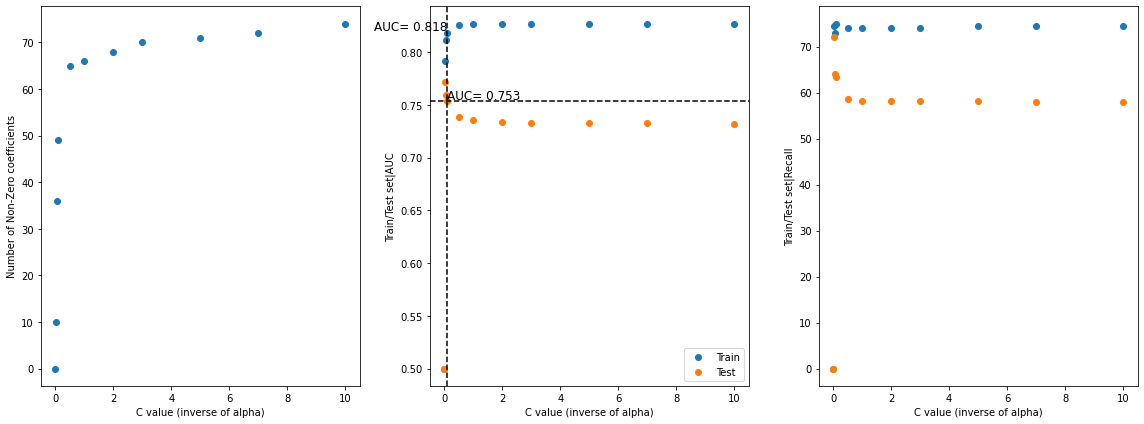

,0.001,0.010,0.050,0.100,0.500,1.000,2.000,3.000,5.000,7.000,10.000
accuracy on test set,90.174292,69.760349,72.54902,72.505447,72.418301,72.48366,72.54902,72.614379,72.570806,72.48366,72.461874


In [59]:
LogReg_tuning('liblinear',X_annual,X_train_annual_scaled,X_test_annual_scaled,y_train_annual,y_test_annual,3)
#choose the 4th c value tried,

* Choose C=0.1.
* Only use 'liblinear' or 'saga' can be used as the solver for L1 regularization. Here, choose 'liblinear' as the sample size is <10,000.

In [86]:
LogReg_annual = LogisticRegression(penalty='l1', solver='liblinear',C = 0.1,class_weight = {0:1,1:10})
LogReg_annual.fit(X_train_annual_scaled, y_train_annual.values.ravel())

LogisticRegression(C=0.1, class_weight={0: 1, 1: 10}, penalty='l1',
                   solver='liblinear')

#### Step 2.5: Plot coefficient values or feature importance.  <== Annual, LogReg

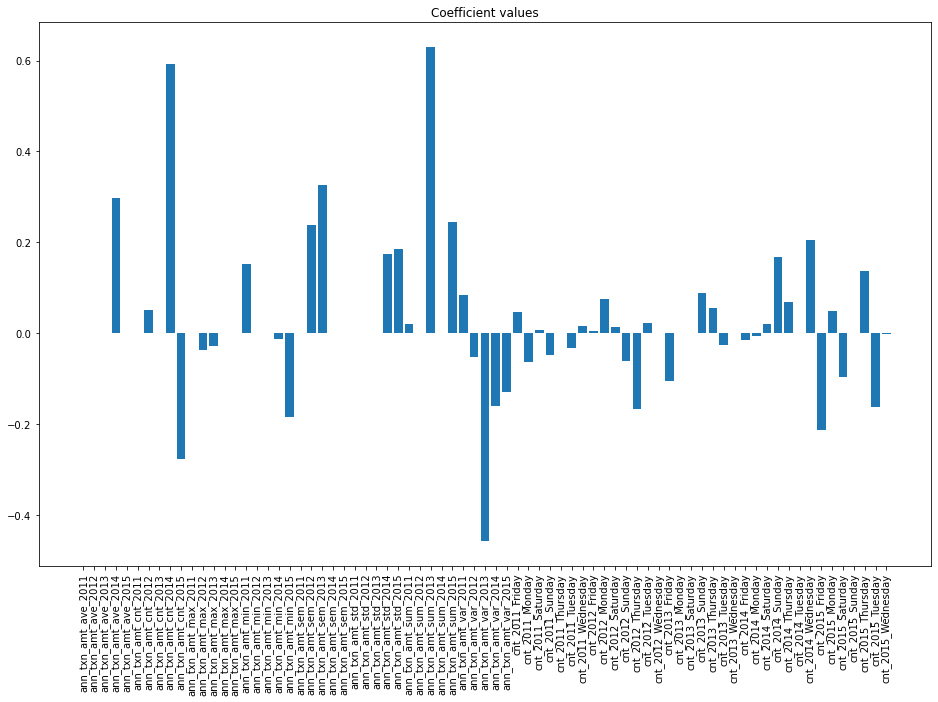

In [87]:
import matplotlib.pyplot as plt
coef = LogReg_annual.coef_
plt.figure(figsize=(16,10))
plt.title("Coefficient values")
plt.bar(range(X_train_annual.shape[1]), coef[0])   # Add bars
plt.xticks(range(X_train_annual.shape[1]), X_train_annual.columns, rotation=90)    # Add feature names as x-axis labels
plt.show()

#### Step 2.6: Plot probability distribution for test set  <== Annual, LogReg

In [88]:
import seaborn as sns
def prob_distribution_plot(model,X_test):
    y_test_proba = model.predict_proba(X_test)
    plt.figure(figsize=(5,5))
    sns.displot(data = y_test_proba[:,1])
    plt.title('Distribution of probabilities to positive')
    plt.xlabel('Probability to positive(0 to 1)')
    plt.ylabel('Counts of clients')
    plt.show()

<Figure size 360x360 with 0 Axes>

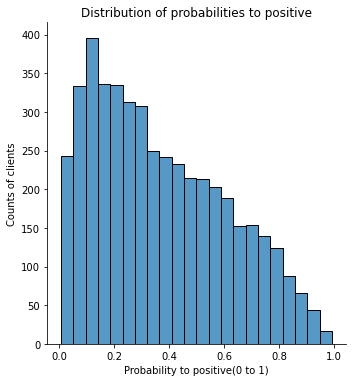

In [89]:
prob_distribution_plot(LogReg_annual,X_test_annual_scaled)

#### Step 2.7: Plot confusion matrix and ROC curves of train/test set. Precision/recall.  <== Annual, LogReg

In [90]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
import numpy as np

def cm_plot(X_test, y_test, DT):
    y_test_predicted = DT.predict(X_test)
    cm = confusion_matrix(y_test, y_test_predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Negtive or Positive Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 15,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()
    
def roc_train_test_curve(model,X_train,X_test,y_train,y_test, Title):
    scores_train = model.predict_proba(X_train)[:, 1]  # Scores for train set
    scores_test = model.predict_proba(X_test)[:, 1]     # Scores for test set

    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)  # ROC Calc Train set
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)  # ROC Calc Test set
    auc_train = auc(fpr_train, tpr_train)  # AUC Calc
    auc_test  = auc(fpr_test, tpr_test) # AUC Calc

    # Plotting
    plt.figure(figsize=(6,6))
    plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
    plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
    plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
    plt.ylim([0,1.0])
    plt.xlim([0,1.0])
    plt.title(Title, fontsize = 18)
    plt.ylabel('True positive rate', fontsize = 18)
    plt.xlabel('False positive rate', fontsize = 18)
    plt.legend()
    plt.show()

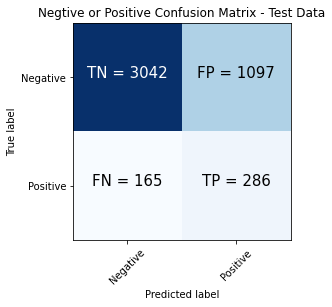

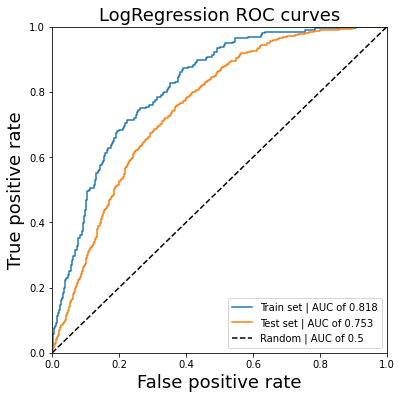

              precision    recall  f1-score   support

    Negative       0.95      0.73      0.83      4139
    Positive       0.21      0.63      0.31       451

    accuracy                           0.73      4590
   macro avg       0.58      0.68      0.57      4590
weighted avg       0.88      0.73      0.78      4590



In [91]:
cm_plot(X_test_annual_scaled, y_test_annual,LogReg_annual)

roc_train_test_curve(LogReg_annual,X_train_annual_scaled,X_test_annual_scaled,
                     y_train_annual,y_test_annual, 'LogRegression ROC curves,Annual')

LogReg_y_test_annual_predicted = LogReg_annual.predict(X_test_annual_scaled)
print(classification_report(y_test_annual, LogReg_y_test_annual_predicted, target_names = ['Negative', 'Positive']))

#### Step 2.8: Plot decision boundary for top 2 features. <== Annual, LogReg

In [92]:
top1_idx = np.argpartition(abs(coef[0]),-2)[-2:][-1]
top1 = X_train_annual.columns[top1_idx]
top2_idx = np.argpartition(abs(coef[0]),-2)[-2:][-2]
top2 = X_train_annual.columns[top2_idx]
print('The 2 most important features are:\n',
      'index:',top1_idx,'|feature:',top1, '\n','index:',top2_idx,'|feature:',top2)

The 2 most important features are:
 index: 32 |feature: ann_txn_amt_sum_2013 
 index: 8 |feature: ann_txn_amt_cnt_2014


The coefficients with the highest values are ann_txn_amt_sum_2014 and ann_txn_amt_sum_2013. Here, we will plot the decision boundary in the plane of these two variables. Explore the min and max values of these two variables and draw the contour of the probabilities on the plane, along with some labeled data.

Bound for ann_txn_amt_sum_2013: (-1.6977424959358869, 5.53912436943854)
Bound for ann_txn_amt_cnt_2014: (-2.0870367135984464, 3.6694938887815822)


[None,
 (-2.0, 6.0),
 (-2.3, 4.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2014 scaled'),
 Text(0, 0.5, 'ann_txn_amt_sum_2013 scaled')]

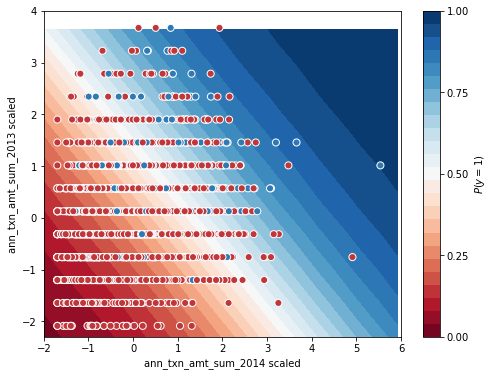

In [95]:
print('Bound for ann_txn_amt_sum_2013:',(X_train_annual_scaled.min(axis=0)[top1_idx],X_train_annual_scaled.max(axis=0)[top1_idx]))
print('Bound for ann_txn_amt_cnt_2014:',(X_train_annual_scaled.min(axis=0)[top2_idx],X_train_annual_scaled.max(axis=0)[top2_idx]))

xx, yy = np.mgrid[-2:6:0.88, -2.3:4:0.66] # The steps 0.88 and 0.66 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
#grid.shape #==> Confirm that grid shape is 10x10
median_inputs = np.ones((100, 75)) * np.median(X_train_annual_scaled, axis=0) 
median_inputs[:,32] = grid[:,0]
median_inputs[:,8] = grid[:,1]   #replace the 32nd and 37th column with the values of the grid
# pd.DataFrame(median_inputs) ==>if want to show the table
probs = LogReg_annual.predict_proba(median_inputs)[:, 1].reshape(xx.shape)   #Score the artificial data on the grid

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual_scaled[:,32], X_train_annual_scaled[:, 8], c=y_train_annual.values[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)

ax.set(aspect="auto",xlim=(-2, 6), ylim=(-2.3, 4),
       xlabel="ann_txn_amt_sum_2013 scaled", ylabel="ann_txn_amt_cnt_2014 scaled")


## * Method 2: Annual, Decision Tree
#### Algorithm does not depend on scaling of inputs. Do NOT have to pre-process data.
#### Step 2.4: Fit the training dataset and optimize the hyperparameters of the method.  <== Annual, Decision Tree

* As shown above, within the annual outputs, there are  2098 of responses with value 0, but only 196 of responses with value 1, so here we set the class_weight to be class_weight={0:1,1:10}, as we are doing the promotional campaign, we want to miss less potential clients we are searching. The objective function can be seen more balanced. To more specific, if we misclassify a positive as a negtive, the error is 1, but if we misclassify a positive, the error is 10. 
* The other hyperparameters can be considered are:
    * min_sample_leaf: The minimum number of samples required to be at a leaf node.
    * max_depth: The maximum depth of the tree
    * min_samples_split: The minimum number of samples required to split an internal node
* Use RandomizedSearchCV as we the number of combinations may explode for tunning 3 hyperparameters, there are 11* 15* 6 combinations in total below.

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

random_grid_annual = {'max_depth': [int(x) for x in np.linspace(1, 41, num = 20)]  ,
               'min_samples_split': [int(x) for x in np.linspace(20, 530, num = 25)],
               'min_samples_leaf': [int(x) for x in np.linspace(20, 50, num = 4)]}
scoring = {'accuracy': make_scorer(accuracy_score),'auc':make_scorer(roc_auc_score),'f1': make_scorer(f1_score)}

model_DT_annual = DecisionTreeClassifier(random_state=1147,class_weight= {0:1,1:10})
dt_random_annual = RandomizedSearchCV(estimator = model_DT_annual, param_distributions = random_grid_annual, 
                                      scoring = scoring,refit = 'auc',n_iter = 200, cv = 3, verbose=2, n_jobs = -1,
                                     random_state=1147)
dt_random_annual = dt_random_annual.fit(X_train_annual, y_train_annual.values.ravel()) # Fit the random search model
dt_random_annual.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'min_samples_split': 466, 'min_samples_leaf': 45, 'max_depth': 17}

In [114]:
DT_annual = DecisionTreeClassifier(random_state= 1147,class_weight= {0:1,1:10},
                                  min_samples_split= 466,min_samples_leaf= 45,max_depth= 17)
DT_annual.fit(X_train_annual, y_train_annual.values.ravel()) 

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=17,
                       min_samples_leaf=45, min_samples_split=466,
                       random_state=1147)

#### Step 2.5: Plot coefficient values or feature importance  <== Annual, Decision Tree

In [115]:
def coff_DT(model,X):
    importances= model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
    names = [X.columns[i] for i in indices] # Rearrange feature names to match the sorted feature importances

    plt.figure(figsize=(15,6))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), names, rotation=90)   # Add feature names as x-axis labels
    plt.show()
    print('The 2 most important features are:\nindex:',indices[:2],'\nname:',names[:2])

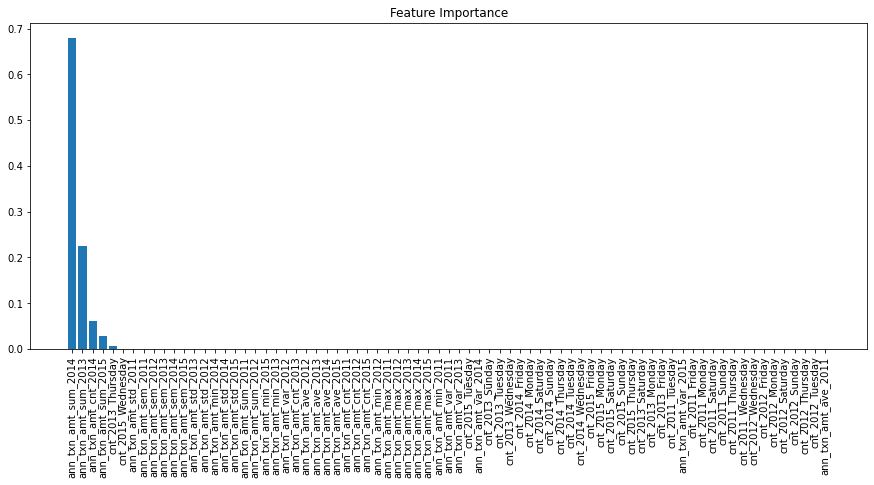

The 2 most important features are:
index: [33 32] 
name: ['ann_txn_amt_sum_2014', 'ann_txn_amt_sum_2013']


In [116]:
coff_DT(DT_annual,X_annual)

#### Step 2.6: Plot probability distribution for test set <== Annual, Decision Tree
#### Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Annual, Decision Tree

<Figure size 360x360 with 0 Axes>

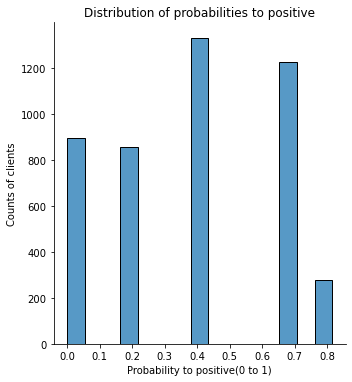

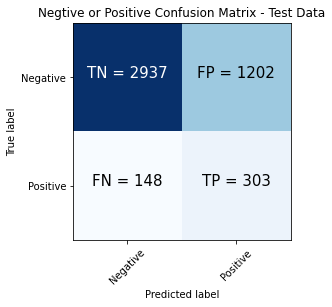

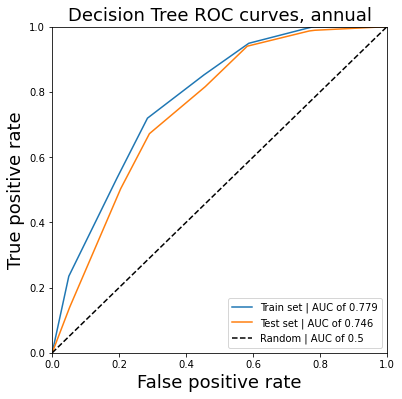

              precision    recall  f1-score   support

    Negative       0.95      0.71      0.81      4139
    Positive       0.20      0.67      0.31       451

    accuracy                           0.71      4590
   macro avg       0.58      0.69      0.56      4590
weighted avg       0.88      0.71      0.76      4590



In [194]:
prob_distribution_plot(DT_annual,X_test_annual)    #2.6
cm_plot(X_test_annual, y_test_annual,DT_annual)    #2.7
roc_train_test_curve(DT_annual,X_train_annual,X_test_annual,y_train_annual,
                     y_test_annual,'Decision Tree ROC curves, annual')
DT_y_test_annual_predicted = DT_annual.predict(X_test_annual)
print(classification_report(y_test_annual, DT_y_test_annual_predicted, target_names = ['Negative', 'Positive']))

#### Step 2.8: Plot decision boundary for top 2 features <== Annual, Decision Tree

In [119]:
print('Bound for ann_txn_amt_sum_2014:',(X_train_annual.min(axis=0)[33],X_train_annual.max(axis=0)[33]))
print('Bound for ann_txn_amt_sum_2013:',(X_train_annual.min(axis=0)[32],X_train_annual.max(axis=0)[32]))

Bound for ann_txn_amt_sum_2014: (0.0, 974.0)
Bound for ann_txn_amt_sum_2013: (0.0, 1317.0)


/Users/zo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[None,
 (0.0, 1000.0),
 (0.0, 1350.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2014'),
 Text(0, 0.5, 'ann_txn_amt_sum_2013')]

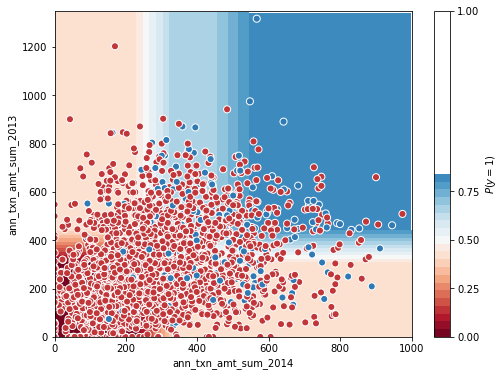

In [120]:
xx, yy = np.mgrid[0.0:1000:111, 0.0:1350:149] # The steps 111 and 149 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
#grid.shape #==> Confirm that grid shape is 10x10
median_inputs = np.ones((100, 75)) * np.median(X_train_annual, axis=0) 
median_inputs[:,33] = grid[:,0]
median_inputs[:,32] = grid[:,1]   #replace the 32nd and 37th column with the values of the grid
# pd.DataFrame(median_inputs) ==>if want to show the table
probs = DT_annual.predict_proba(median_inputs)[:, 1].reshape(xx.shape)   #Score the artificial data on the grid

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_annual.iloc[:,33], X_train_annual.iloc[:, 32], c=y_train_annual.values[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(0, 1000), ylim=(0, 1350),
       xlabel="ann_txn_amt_sum_2014", ylabel="ann_txn_amt_sum_2013")

## * Method 3: Annual, Random Forest
#### Step 2.4: Fit the training dataset and optimize the hyperparameters of the method. <== Annual, Random Forest

In [305]:
from sklearn.ensemble import RandomForestClassifier
random_grid_annual = {'max_depth': [5,10,15,20,25,30],
                      'n_estimators':[100,200,300],
                      'max_features': range(5,60,5)}
scoring = {'accuracy': make_scorer(accuracy_score),'auc':make_scorer(roc_auc_score),'f1': make_scorer(f1_score)}

model_RFC_annual = RandomForestClassifier(random_state=1147,class_weight={0:1,1:10})
rf_random_annual = RandomizedSearchCV(estimator = model_RFC_annual, param_distributions = random_grid_annual, 
                                          scoring = scoring, refit = 'auc',verbose=2, cv=3, n_iter= 50,
                                      random_state=1147)
rf_random_annual = rf_random_annual.fit(X_train_annual, y_train_annual.values.ravel())
rf_random_annual.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ....max_depth=25, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=25, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=25, max_features=10, n_estimators=100; total time=   0.3s
[CV] END .....max_depth=5, max_features=45, n_estimators=300; total time=   1.9s
[CV] END .....max_depth=5, max_features=45, n_estimators=300; total time=   1.9s
[CV] END .....max_depth=5, max_features=45, n_estimators=300; total time=   1.9s
[CV] END ....max_depth=30, max_features=45, n_estimators=300; total time=   3.0s
[CV] END ....max_depth=30, max_features=45, n_estimators=300; total time=   3.0s
[CV] END ....max_depth=30, max_features=45, n_estimators=300; total time=   2.9s
[CV] END ....max_depth=20, max_features=15, n_estimators=100; total time=   0.4s
[CV] END ....max_depth=20, max_features=15, n_estimators=100; total time=   0.4s
[CV] END ....max_depth=20, max_features=15, n_e

[CV] END ....max_depth=30, max_features=15, n_estimators=300; total time=   1.2s
[CV] END ....max_depth=20, max_features=50, n_estimators=100; total time=   1.1s
[CV] END ....max_depth=20, max_features=50, n_estimators=100; total time=   1.2s
[CV] END ....max_depth=20, max_features=50, n_estimators=100; total time=   1.1s
[CV] END .....max_depth=5, max_features=35, n_estimators=300; total time=   1.6s
[CV] END .....max_depth=5, max_features=35, n_estimators=300; total time=   1.7s
[CV] END .....max_depth=5, max_features=35, n_estimators=300; total time=   1.6s
[CV] END ....max_depth=10, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=10, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=10, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=30, max_features=25, n_estimators=200; total time=   1.2s
[CV] END ....max_depth=30, max_features=25, n_estimators=200; total time=   1.2s
[CV] END ....max_depth=30, m

{'n_estimators': 200, 'max_features': 10, 'max_depth': 5}

In [306]:
RFC_annual = RandomForestClassifier(random_state= 1147,class_weight= {0:1,1:10},
                                    max_depth= 5,n_estimators= 200, max_features= 10)
RFC_annual = RFC_annual.fit(X_train_annual, y_train_annual.values.ravel()) 

#### Step 2.5: Plot coefficient values or feature importance <== Annual, Random Forest



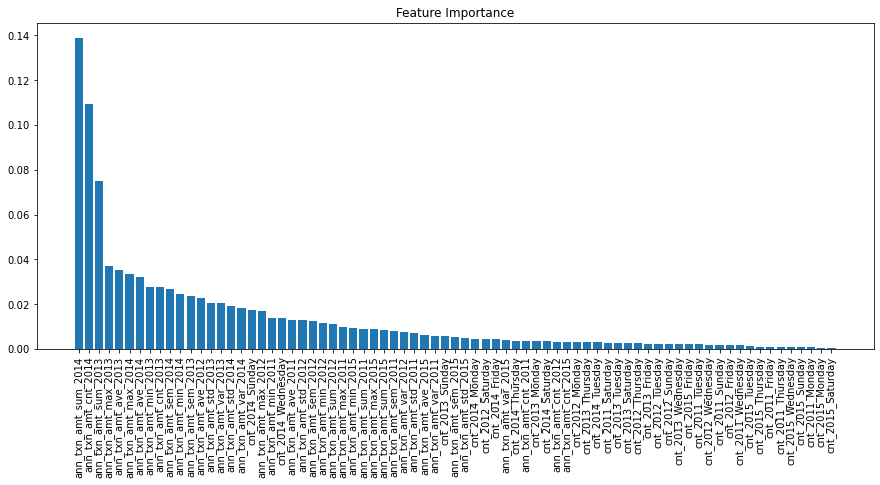

The 2 most important features are:
index: [33  8] 
name: ['ann_txn_amt_sum_2014', 'ann_txn_amt_cnt_2014']


In [307]:
coff_DT(RFC_annual,X_annual)

#### Step 2.6: Plot probability distribution for test set <== Annual, Random Forest
#### Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <==  Annual, Random Forest

<Figure size 360x360 with 0 Axes>

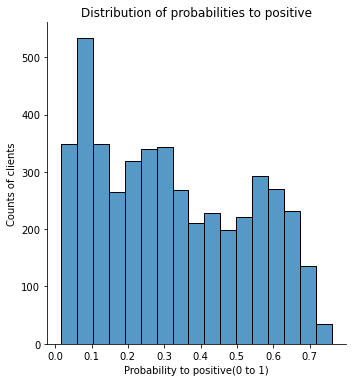

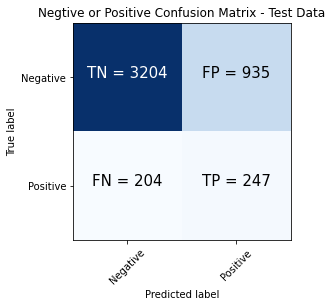

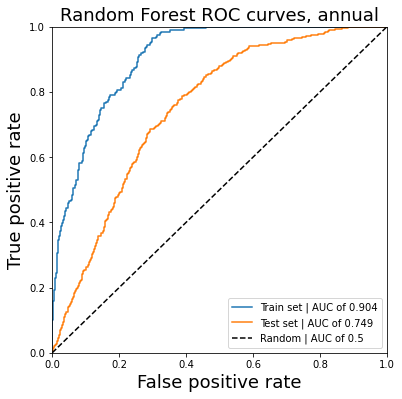

              precision    recall  f1-score   support

    Negative       0.94      0.77      0.85      4139
    Positive       0.21      0.55      0.30       451

    accuracy                           0.75      4590
   macro avg       0.57      0.66      0.58      4590
weighted avg       0.87      0.75      0.80      4590



In [308]:
prob_distribution_plot(RFC_annual,X_test_annual)   #2.6
cm_plot(X_test_annual, y_test_annual,RFC_annual)  #2.7
roc_train_test_curve(RFC_annual,X_train_annual,X_test_annual,y_train_annual,
                     y_test_annual,'Random Forest ROC curves, annual')
RFC_y_test_annual_predicted = RFC_annual.predict(X_test_annual)
print(classification_report(y_test_annual, RFC_y_test_annual_predicted, target_names = ['Negative', 'Positive']))

#### Step 2.8: Plot decision boundary for top 2 features.  <== Annual, Random Forest

In [309]:
print('Bound for ann_txn_amt_sum_2014:',(X_train_annual.min(axis=0)[33],X_train_annual.max(axis=0)[33]))
print('Bound for ann_txn_amt_cnt_2014:',(X_train_annual.min(axis=0)[8],X_train_annual.max(axis=0)[8]))

Bound for ann_txn_amt_sum_2014: (0.0, 974.0)
Bound for ann_txn_amt_cnt_2014: (0.0, 13.0)


/Users/zo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[None,
 (0.0, 1000.0),
 (0.0, 13.5),
 Text(0.5, 0, 'ann_txn_amt_sum_2014'),
 Text(0, 0.5, 'ann_txn_amt_cnt_2014')]

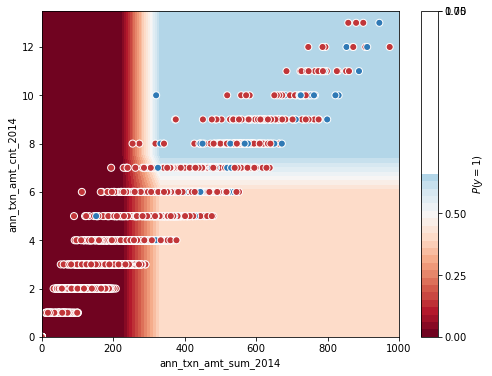

In [310]:
xx, yy = np.mgrid[0:1000:111, 0:15:1.51] # The steps 111 and 1.51 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
#grid.shape #==> Confirm that grid shape is 10x10
median_inputs = np.ones((100, 75)) * np.median(X_train_annual, axis=0) 
median_inputs[:,33] = grid[:,0]
median_inputs[:,8] = grid[:,1]   #replace the 32nd and 37th column with the values of the grid
# pd.DataFrame(median_inputs) ==>if want to show the table
probs = DT_annual.predict_proba(median_inputs)[:, 1].reshape(xx.shape)   #Score the artificial data on the grid

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_annual.iloc[:,33], X_train_annual.iloc[:, 8], c=y_train_annual.values[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(0, 1000), ylim=(0, 13.5),
       xlabel="ann_txn_amt_sum_2014", ylabel="ann_txn_amt_cnt_2014")

# Monthly
#### Step 2.1 - 2.2: Separate the inputs X and the output y. Split the data in train and test set.

In [127]:
# Separate the inputs X and the output y,,Split the data in train and test set.
monthly_features_outputs_clean = monthly_features_outputs.dropna()   #drop samples with unknow 3M,6M, 12M
X_monthly = monthly_features_outputs_clean.iloc[:,3:-1]   #drop columns, output and customer_id
y_monthly = pd.DataFrame(monthly_features_outputs_clean.loc[:,'response'])
X_train_monthly,X_test_monthly,y_train_monthly,y_test_monthly = train_test_split(X_monthly,y_monthly,
                                                                             test_size=2/3,random_state=1147)

## * Method 1: Monthly, Logistic Regression
#### Step 2.3: Pre-process for log regression method. <== Monthly, LogReg

In [128]:
scaler = StandardScaler()     # Create the instance of the scaler
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly)
X_test_monthly_scaled = scaler.transform(X_test_monthly)
y_train_monthly.value_counts()    #imbalanced dataset, 74926 v.s. 7682

response
0           74926
1            7682
dtype: int64

#### Step 2.4: Fit the training dataset and optimize the hyperparameters of the method.  <== Monthly, LogReg

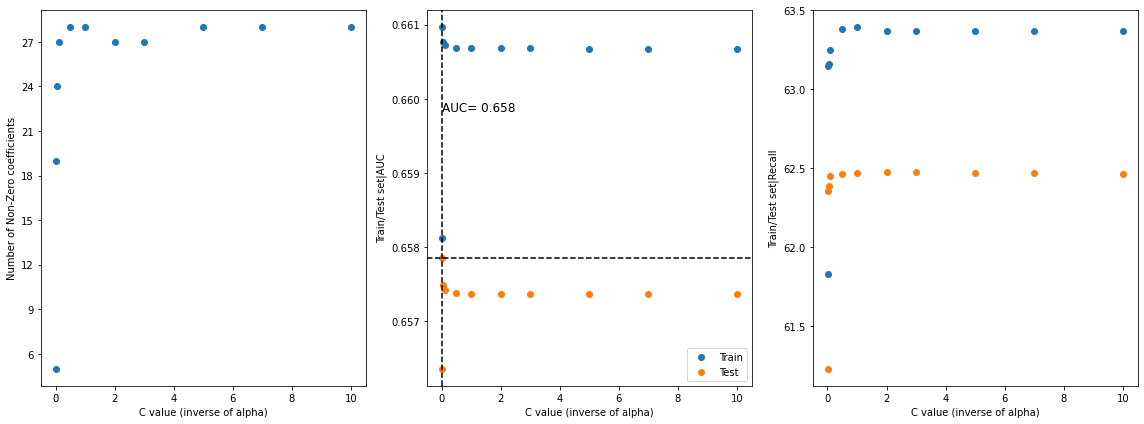

,0.001,0.010,0.050,0.100,0.500,1.000,2.000,3.000,5.000,7.000,10.000
accuracy on test set,61.79002,60.736854,60.617616,60.622458,60.610353,60.612168,60.615195,60.6158,60.615195,60.614589,60.613379


In [166]:
LogReg_tuning('saga',X_monthly,X_train_monthly_scaled,X_test_monthly_scaled,y_train_monthly,y_test_monthly,1)

* Choose solver='saga' for large sample size,as the sample size is more than 10,000.
* choose the 2nd C=0.01

In [147]:
LogReg_monthly = LogisticRegression(penalty='l1', solver='saga',C = 0.01,class_weight={0:1,1:10})
LogReg_monthly.fit(X_train_monthly_scaled, y_train_monthly.values.ravel())

LogisticRegression(C=0.01, class_weight={0: 1, 1: 10}, penalty='l1',
                   solver='saga')

#### Step 2.5: Plot coefficient values or feature importance.    <== Monthly, LogReg

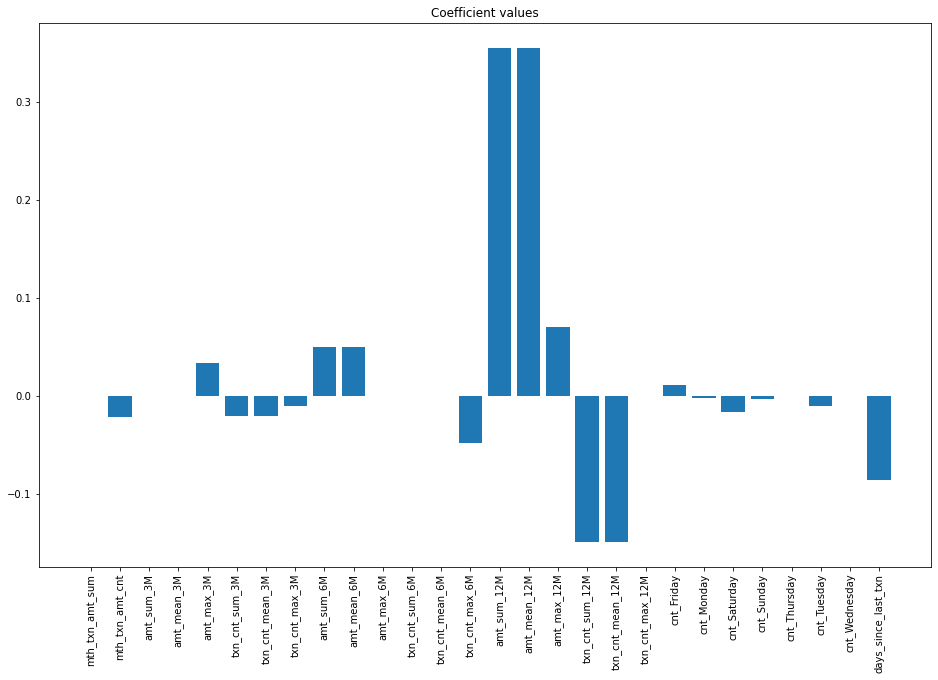

In [148]:
#Plot coefficient values or feature importance
coef_monthly = LogReg_monthly.coef_
plt.figure(figsize=(16,10))
plt.title("Coefficient values")
plt.bar(range(X_train_monthly.shape[1]), coef_monthly [0])   # Add bars
plt.xticks(range(X_train_monthly.shape[1]), X_train_monthly.columns, rotation=90)    # Add feature names as x-axis labels
plt.show()

#### Step 2.6:  Plot probability distribution for test set. <== Monthly, LogReg

<Figure size 360x360 with 0 Axes>

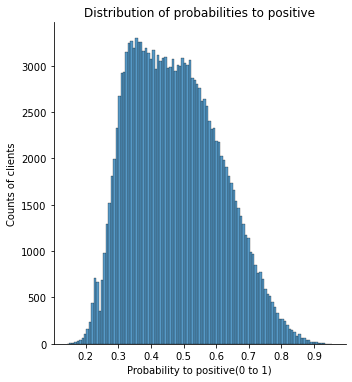

In [149]:
prob_distribution_plot(LogReg_monthly,X_test_monthly_scaled)   #Plot probability distribution for test set

#### Step 2.7: Plot confusion matrix, ROC curves of train/test set. Calculate precision/recall.  <== Monthly, LogReg

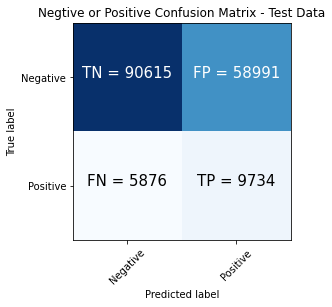

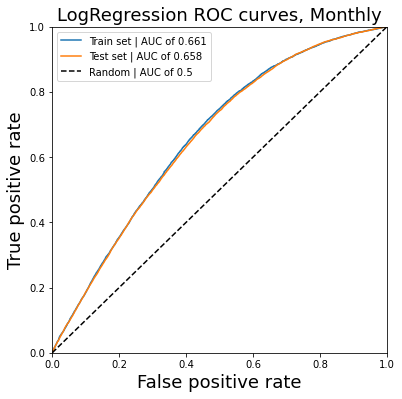

              precision    recall  f1-score   support

    Negative       0.94      0.61      0.74    149606
    Positive       0.14      0.62      0.23     15610

    accuracy                           0.61    165216
   macro avg       0.54      0.61      0.48    165216
weighted avg       0.86      0.61      0.69    165216



In [150]:
cm_plot(X_test_monthly_scaled, y_test_monthly,LogReg_monthly)      # confusion matrix
roc_train_test_curve(LogReg_monthly,X_train_monthly_scaled,X_test_monthly_scaled,
                     y_train_monthly,y_test_monthly, 'LogRegression ROC curves, Monthly')   #ROC on train/test set

LogReg_y_test_monthly_predicted = LogReg_monthly.predict(X_test_monthly_scaled)   #precison, recall
print(classification_report(y_test_monthly, LogReg_y_test_monthly_predicted, target_names = ['Negative', 'Positive']))

#### Step 2.8: Plot decision boundary for top 2 features.   <== Monthly, LogReg

The 2 most important features are:
 index: 14 |feature: amt_sum_12M 
 index: 15 |feature: amt_mean_12M
Bound for amt_sum_12M: (-1.7308432264927935, 5.7048936916189605)
Bound for amt_mean_12M: (-1.7308432264927938, 5.704893691618961)


[None,
 (-2.0, 6.0),
 (-2.0, 6.0),
 Text(0.5, 0, 'amt_sum_12M scaled'),
 Text(0, 0.5, 'amt_mean_12M scaled')]

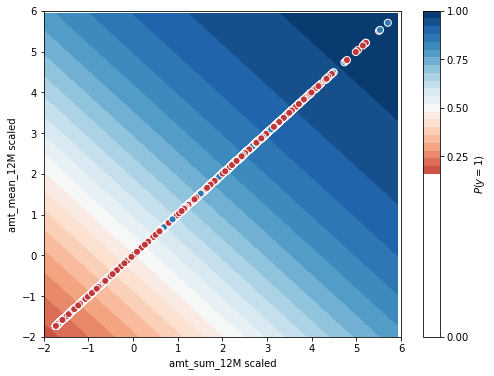

In [151]:
top1_idx_monthly = np.argpartition(abs(coef_monthly [0]),-2)[-2:][0]
top1_monthly = X_train_monthly.columns[top1_idx_monthly]
top2_idx_monthly = np.argpartition(abs(coef_monthly [0]),-2)[-2:][1]
top2_monthly = X_train_monthly.columns[top2_idx_monthly]
print('The 2 most important features are:\n',
      'index:',top1_idx_monthly,'|feature:',top1_monthly, '\n','index:',top2_idx_monthly,'|feature:',top2_monthly)
print('Bound for amt_sum_12M:',(X_train_monthly_scaled.min(axis=0)[top1_idx_monthly],X_train_monthly_scaled.max(axis=0)[top1_idx_monthly]))
print('Bound for amt_mean_12M:',(X_train_monthly_scaled.min(axis=0)[top2_idx_monthly],X_train_monthly_scaled.max(axis=0)[top2_idx_monthly]))

xx, yy = np.mgrid[-2:6:0.88, -2:6:0.88] # The steps 0.88 to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
#grid.shape #==> Confirm that grid shape is 10x10
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly_scaled, axis=0) 
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]   #replace the 14th and 15th column with the values of the grid
# pd.DataFrame(median_inputs) ==>if want to show the table
probs = LogReg_monthly.predict_proba(median_inputs)[:, 1].reshape(xx.shape)   #Score the artificial data on the grid

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_monthly_scaled[:,14], X_train_monthly_scaled[:, 15], c=y_train_monthly.values[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(-2, 6), ylim=(-2, 6),
       xlabel="amt_sum_12M scaled", ylabel="amt_mean_12M scaled")


## * Method 2: Monthly, Decision Tree
#### Step 2.4: Fit the training dataset and optimize the hyperparameters of the method.  <== Monthly, Decision Tree

* As shown above, within the annual outputs, there are  74926 of responses with value 0, but only 7682 of responses with value 1, so here we set the class_weight to be class_weight={0:1,1:10}, as we are doing the promotional campaign, we want to miss less potential clients we are searching. The objective function can be seen more balanced. To more specific, if we misclassify a positive as a negtive, the error is 1, but if we misclassify a positive, the error is 10. 
* The other hyperparameters can be considered are:
    * min_sample_leaf: The minimum number of samples required to be at a leaf node.
    * max_depth: The maximum depth of the tree
    * min_samples_split: The minimum number of samples required to split an internal node:

In [153]:
random_grid_monthly = {'max_depth': [int(x) for x in np.linspace(1, 25, num = 12)]  ,
               'min_samples_split': [int(x) for x in np.linspace(100, 600, num = 50)],
               'min_samples_leaf': [int(x) for x in np.linspace(50, 300, num = 10)]}
model_DT_monthly = DecisionTreeClassifier(random_state=1147,class_weight= {0:1,1:10})
dt_random_monthly = RandomizedSearchCV(estimator = model_DT_monthly, param_distributions = random_grid_monthly, 
                                       scoring = scoring,refit = 'auc',n_iter = 100, 
                                       cv = 3, verbose=2, random_state=1147, n_jobs = -1)
dt_random_monthly.fit(X_train_monthly, y_train_monthly.values.ravel())  # Fit the random search model
    
dt_random_monthly.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 314, 'min_samples_leaf': 133, 'max_depth': 5}

In [154]:
DT_monthly = DecisionTreeClassifier(random_state= 1147,class_weight= {0:1,1:10},
                                  min_samples_split= 314,min_samples_leaf= 133,max_depth= 5)
DT_monthly.fit(X_train_monthly, y_train_monthly.values.ravel())

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=5,
                       min_samples_leaf=133, min_samples_split=314,
                       random_state=1147)

#### Step 2.5: Plot coefficient values or feature importance <== Monthly, Decision Tree

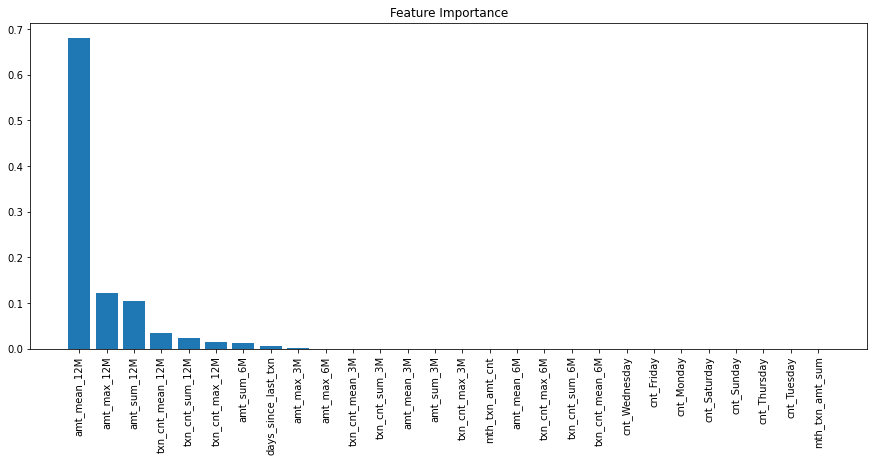

The 2 most important features are:
index: [15 16] 
name: ['amt_mean_12M', 'amt_max_12M']


In [155]:
coff_DT(DT_monthly,X_monthly)

#### Step 2.6: Plot probability distribution for test set <== Monthly, Decision Tree

<Figure size 360x360 with 0 Axes>

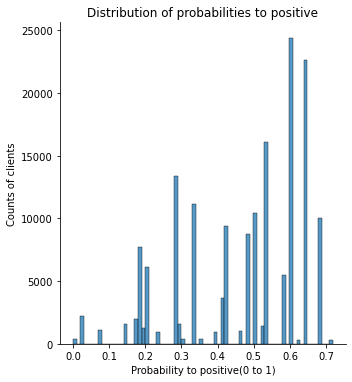

In [156]:
prob_distribution_plot(DT_monthly,X_test_monthly)

#### Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Monthly, Decision Tree

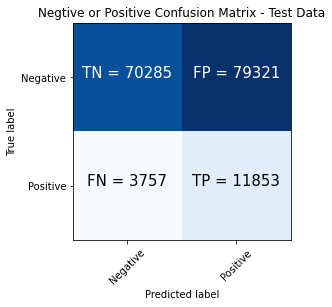

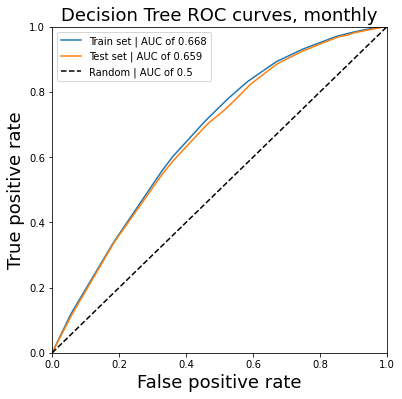

              precision    recall  f1-score   support

    Negative       0.95      0.47      0.63    149606
    Positive       0.13      0.76      0.22     15610

    accuracy                           0.50    165216
   macro avg       0.54      0.61      0.43    165216
weighted avg       0.87      0.50      0.59    165216



In [157]:
cm_plot(X_test_monthly, y_test_monthly,DT_monthly)
roc_train_test_curve(DT_monthly,X_train_monthly,X_test_monthly,y_train_monthly,
                     y_test_monthly,'Decision Tree ROC curves, monthly')
DT_y_test_monthly_predicted = DT_monthly.predict(X_test_monthly)
print(classification_report(y_test_monthly, DT_y_test_monthly_predicted, target_names = ['Negative', 'Positive']))

#### Step 2.8: Plot decision boundary for top 2 features.  <== Monthly, Decision Tree

In [158]:
print('Bound for amt_mean_12M:',(X_train_monthly.min(axis=0)[15],X_train_monthly.max(axis=0)[15]))
print('Bound for amt_max_12M:',(X_train_monthly.min(axis=0)[16],X_train_monthly.max(axis=0)[16]))

Bound for amt_mean_12M: (0.0, 109.75)
Bound for amt_max_12M: (0.0, 460.0)


/Users/zo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[None,
 (0.0, 120.0),
 (0.0, 480.0),
 Text(0.5, 0, 'amt_mean_12M'),
 Text(0, 0.5, 'amt_max_12M')]

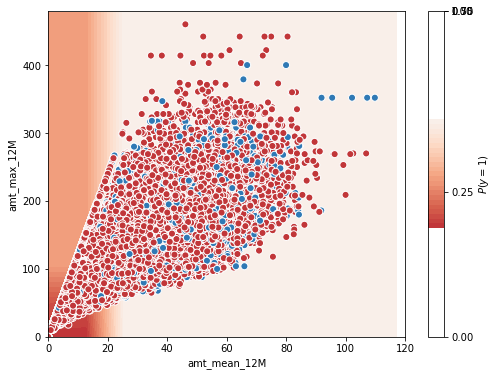

In [159]:
xx, yy = np.mgrid[0:120:13, 0:480:53] # The steps 13 and 53 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
#grid.shape #==> Confirm that grid shape is 10x10
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 
median_inputs[:,15] = grid[:,0]
median_inputs[:,16] = grid[:,1]   #replace the 15th and 16th column with the values of the grid
# pd.DataFrame(median_inputs) ==>if want to show the table
probs = DT_monthly.predict_proba(median_inputs)[:, 1].reshape(xx.shape)   #Score the artificial data on the grid

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_monthly.iloc[:,15], X_train_monthly.iloc[:, 16], c=y_train_monthly.values[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(0, 120), ylim=(0, 480),
       xlabel="amt_mean_12M", ylabel="amt_max_12M")

## * Method 3: Monthly, Random Forest
#### Step 2.4: Fit the training dataset and optimize the hyperparameters of the method. <== Monthly, Random Forest

In [314]:
# hyperparameter tuning
random_grid_monthly = {'max_depth': [5,10,20],
                      'n_estimators':[100,200,300],
                      'max_features':list(range(5, 20,2))}
scoring = {'accuracy': make_scorer(accuracy_score),'auc':make_scorer(roc_auc_score),'f1': make_scorer(f1_score)}

model_RFC_monthly = RandomForestClassifier(random_state=1147,class_weight={0:1,1:10})
rf_random_monthly = RandomizedSearchCV(estimator = model_RFC_monthly, param_distributions = random_grid_monthly, 
                                      scoring = scoring, refit = 'auc', cv = 3, verbose=2,n_iter= 50,random_state=1147)
rf_random_monthly= rf_random_monthly.fit(X_train_monthly, y_train_monthly.values.ravel())
rf_random_monthly.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ....max_depth=10, max_features=13, n_estimators=100; total time=   8.5s
[CV] END ....max_depth=10, max_features=13, n_estimators=100; total time=   8.5s
[CV] END ....max_depth=10, max_features=13, n_estimators=100; total time=   8.5s
[CV] END ....max_depth=10, max_features=19, n_estimators=200; total time=  24.2s
[CV] END ....max_depth=10, max_features=19, n_estimators=200; total time=  23.9s
[CV] END ....max_depth=10, max_features=19, n_estimators=200; total time=  24.6s
[CV] END .....max_depth=20, max_features=5, n_estimators=100; total time=   6.2s
[CV] END .....max_depth=20, max_features=5, n_estimators=100; total time=   6.3s
[CV] END .....max_depth=20, max_features=5, n_estimators=100; total time=   6.3s
[CV] END .....max_depth=5, max_features=13, n_estimators=200; total time=   9.4s
[CV] END .....max_depth=5, max_features=13, n_estimators=200; total time=   9.4s
[CV] END .....max_depth=5, max_features=13, n_e

[CV] END .....max_depth=10, max_features=9, n_estimators=300; total time=  18.4s
[CV] END ....max_depth=10, max_features=17, n_estimators=100; total time=  10.9s
[CV] END ....max_depth=10, max_features=17, n_estimators=100; total time=  10.7s
[CV] END ....max_depth=10, max_features=17, n_estimators=100; total time=  10.8s
[CV] END ....max_depth=10, max_features=19, n_estimators=100; total time=  12.0s
[CV] END ....max_depth=10, max_features=19, n_estimators=100; total time=  11.9s
[CV] END ....max_depth=10, max_features=19, n_estimators=100; total time=  12.5s
[CV] END ....max_depth=10, max_features=11, n_estimators=100; total time=   7.4s
[CV] END ....max_depth=10, max_features=11, n_estimators=100; total time=   7.4s
[CV] END ....max_depth=10, max_features=11, n_estimators=100; total time=   7.7s
[CV] END ....max_depth=20, max_features=13, n_estimators=100; total time=  13.6s
[CV] END ....max_depth=20, max_features=13, n_estimators=100; total time=  13.6s
[CV] END ....max_depth=20, m

{'n_estimators': 100, 'max_features': 11, 'max_depth': 5}

In [323]:
RFC_monthly = RandomForestClassifier(random_state= 1147,class_weight= {0:1,1:10},
                                     max_features= 11,max_depth= 5,n_estimators=  100)
RFC_monthly.fit(X_train_monthly, y_train_monthly.values.ravel()) 

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5, max_features=11,
                       random_state=1147)

#### Step 2.5: Plot coefficient values or feature importance <== Monthly, Decision Tree

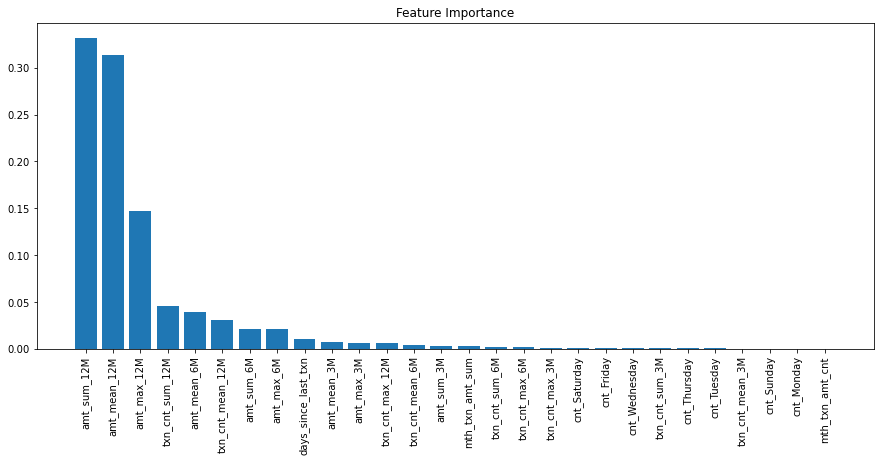

The 2 most important features are:
index: [14 15] 
name: ['amt_sum_12M', 'amt_mean_12M']


In [324]:
coff_DT(RFC_monthly,X_monthly)

#### Step 2.6: Plot probability distribution for test set <== Monthly, Decision Tree
#### Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Monthly, Decision Tree¶

<Figure size 360x360 with 0 Axes>

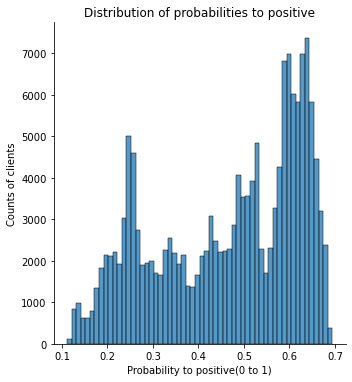

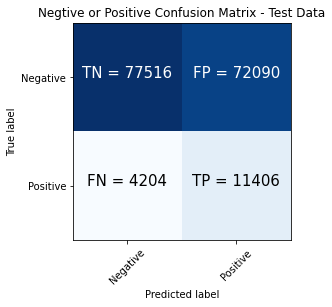

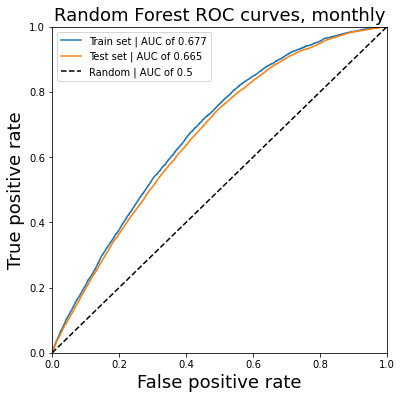

              precision    recall  f1-score   support

    Negative       0.95      0.52      0.67    149606
    Positive       0.14      0.73      0.23     15610

    accuracy                           0.54    165216
   macro avg       0.54      0.62      0.45    165216
weighted avg       0.87      0.54      0.63    165216



In [322]:
prob_distribution_plot(RFC_monthly,X_test_monthly)
cm_plot(X_test_monthly, y_test_monthly,RFC_monthly)
roc_train_test_curve(RFC_monthly,X_train_monthly,X_test_monthly,y_train_monthly,
                     y_test_monthly,'Random Forest ROC curves, monthly')
RFC_y_test_monthly_predicted = RFC_monthly.predict(X_test_monthly)
print(classification_report(y_test_monthly, RFC_y_test_monthly_predicted, target_names = ['Negative', 'Positive']))

#### Step 2.8: Plot decision boundary for top 2 features.  <== Monthly, Decision Tree

In [318]:
print('Bound for amt_sum_12M:',(X_train_monthly.min(axis=0)[14],X_train_monthly.max(axis=0)[14]))
print('Bound for amt_mean_12M:',(X_train_monthly.min(axis=0)[15],X_train_monthly.max(axis=0)[15]))

Bound for amt_sum_12M: (0.0, 1317.0)
Bound for amt_mean_12M: (0.0, 109.75)


/Users/zo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[None,
 (0.0, 1350.0),
 (0.0, 120.0),
 Text(0.5, 0, 'amt_sum_12M'),
 Text(0, 0.5, 'amt_mean_12M')]

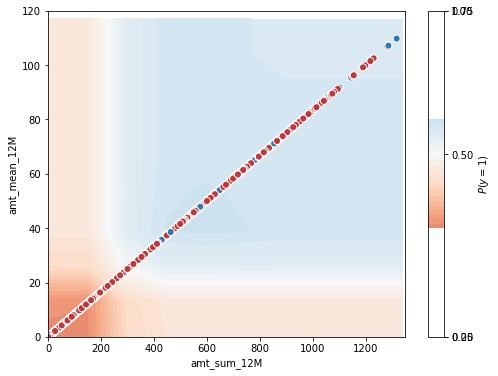

In [320]:
xx, yy = np.mgrid[0:1350:149, 0:120:13] # The steps 150 and 13 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
#grid.shape #==> Confirm that grid shape is 10x10
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]   #replace the 15th and 16th column with the values of the grid
# pd.DataFrame(median_inputs) ==>if want to show the table
probs = RFC_monthly.predict_proba(median_inputs)[:, 1].reshape(xx.shape)   #Score the artificial data on the grid

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_monthly.iloc[:,14], X_train_monthly.iloc[:, 15], c=y_train_monthly.values[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(0, 1350), ylim=(0, 120),
       xlabel="amt_sum_12M", ylabel="amt_mean_12M")

# Part 3: Comparison of methods
By comparing steps 2.5-2.8 of
* two feature engineering: (annual and monthly)
* three modeling approaches (L1 log-reg, tree, forests)

|Feature| approach |auc_train|auc_test|recall_neg|recall_pos|preci_neg|preci_pos|accuracy|top2_fea_idx|
|-------|----------|---------|--------|----------|----------|---------|---------|--------|------------|
| Annual|L1 log_reg|0.818    | 0.753  |0.73      |0.63      |0.95     | 0.21    | 0.73   | 32,38      |
|       |   tree   |0.779    | 0.746  |0.71      |0.67      |0.95     | 0.20    |  0.71  | 32,33      |
|       |  forests |0.904    | 0.749  |0.77      |0.75      |0.94     | 0.21    |  0.75  | 33,8       |
|Monthly|L1 log_reg|0.661    | 0.658  |0.61      |0.62      |0.94     | 0.14    |  0.61  | 14,15      |
|       |   tree   |0.668    | 0.659  |0.47      |0.76      |0.95     | 0.13    |  0.5   | 15,16      |
|       |  forests |0.677    | 0.665  |0.52      |0.73      |0.95     | 0.14    |  0.54  | 14,15      |

* From the plot of cofficients or feature importance, the numbers of useful features by log_reg or random forest are more than that by decision tree. 

* Although the 2 most important features are different accross different method, all 3 combinations have some relationships for each dataset(annual or monthly). For example, for the dataset of annual outputs, the top 2 features are [ann_txn_amt_sum_2013, ann_txn_amt_cnt_2014], [ann_txn_amt_sum_2014,ann_txn_amt_sum_2013] or [ann_txn_amt_sum_2014,ann_txn_amt_cnt_2014] with different approach, which means the the behaviour of 2013 and 2014 are supposed to be considered if we use the annual dataset.

* As we are doing prediction on the response of client to a promotion campaign, we want to miss less potential cilent comparing with annoying a littl more of them who may not going to accept the promotion, as the main purpose is to make money. As a result, the value of the recall on the positive seems to be more important.

* Among the 6 combinations of dataset and approch, the annual features with random forest is chosen as the recall on both postive and negative label are the highest, which means we will miss less potential customers when we also do not annoy many others. And most values of the other metrics are also quite high at the same time. To be noticed, the auc_train here is higher than the auc_test more than other combination, which means the model is a little bit overfit. More suitable model can be built if more hyperparameters are involed to be tuned, but it may takes much more time.